# Modules, namespaces, and classes

There is a `log` function defined in a Python **module** (library of function
definitions) called `numpy`.  In the next cell we **import** the library (execute
all its function definitions in the current Python environment) and then try to use it.

If we try to execute the code in the next cell we get the following error:

```
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
/var/folders/_q/2s1hy5bx1l7f9j1lw9zjgt19_wb463/T/ipykernel_61967/3919341660.py in <module>
      1 import numpy
----> 2 log(2)

NameError: name 'log' is not defined
```

In [31]:
# Raises NameError
import numpy
log(2)

NameError: name 'log' is not defined

We get a name error,  which is the exactly the error we would have gotten if we hadn't done the import at all.

What went wrong?  What went wrong is that we didn't use the right **namespace**
for the function.  When we import the module `numpy` all the functions in it
are defined, but they are defined only as **attributes** of the module. 

Here's our module object:

In [32]:
numpy

<module 'numpy' from '/Users/gawron/opt/anaconda3/envs/p312/lib/python3.12/site-packages/numpy/__init__.py'>

The name `log` is an attribute of that module object.  Pythonistas say the
name `log` is in the module's **namespace**.

In [33]:
numpy.log

<ufunc 'log'>

Whenever we import a module, the names of all the functions defined in it -- in fact all the names defined in it -- are in the module's namespace. 

In the next cell, we **call** the function.  

In [34]:
numpy.log(2)

0.6931471805599453

Here `log` means *natural logarithm*; that is, logarithm to the base $e$.  Besides defining functions, the `numpy` module also defines values for various variables.  One of them is `e`. That means that once the module is imported, the name `e` is  in the module's namespace as well:

In [35]:
numpy.e

2.718281828459045

And we can verify that the base for `log` is $e$.

In [36]:
numpy.log(numpy.e)


1.0

Since

$$e^{1}  = e,$$

$$log_e(e) = 1.$$


The `numpy` module defines many other mathematically useful functions, for instance `numpy.sin` and `numpy.cos`, as well as other mathematically useful names:

In [37]:
numpy.pi

3.141592653589793

Summarizing the points up to here.

1.  Every time you import a module, it defines a set of Python objects in the current Python environment.  Those objects may be functions (like `numpy.log`) or other data types (like `numpy.e`, a number).
2.  The names of those imported objects reside in the module's **namespace**. That is, they are attributes of the module.

The concept of namespace will arise in other contexts; for example,
Python classes have namespaces like modules do.  We discuss that in the next section.
For now, the important thing to understand is that all names belong to a namespace.

Technically, a namespace is just a collection of names linked to the object that each name references; the simplest picture is that of a dictionary in which the keys are the names and the values are the objects.  The builtin namespace contains all the builtin Python
objects, such as the function `len` or the type `int`; these name are not the attributes of any module, so no module prefix is required to access them. 

You can view the entire list of names in any namespace using the function `dir` (for **directory**). Some namespaces are quite large.

You can inspect a module's namespace through the `dir` function. Sometimes however a namespace is pretty big:

In [8]:
len(dir(numpy))

591

So let's just look at ten names in  the namespace from the middle of the namespace list:

In [9]:
dir(numpy)[100:110]

['arctanh',
 'argmax',
 'argmin',
 'argpartition',
 'argsort',
 'argwhere',
 'around',
 'array',
 'array2string',
 'array_equal']

You could use `dir` to check if a name is defined in `numpy`:

In [10]:
'e' in dir(numpy)

True

And this might prove a useful test in a program.

But if you're trying it in a notebook cell, it's actually faster to just try the name out.

In [11]:
numpy.e

2.718281828459045

You can look at the builtin namespace as well, by using the reserved name `__builtins__`. You will find builtin functions as well as all the builtin type names like
`str` and `list` as well as special type instances like `True`,`False`,
and `None`, and function names like `len` and `hash`, as well as a number of things we haven't discussed.

In [93]:
dir(__builtins__)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

Hmm.  Let's try one of these names out.

In [38]:
copyright

Copyright (c) 2001-2023 Python Software Foundation.
All Rights Reserved.

Copyright (c) 2000 BeOpen.com.
All Rights Reserved.

Copyright (c) 1995-2001 Corporation for National Research Initiatives.
All Rights Reserved.

Copyright (c) 1991-1995 Stichting Mathematisch Centrum, Amsterdam.
All Rights Reserved.

Before leaving the subject of imports and namespaces, we mention one fine point, which is important because it arises frequently in Python code.  When imported, a module may be renamed (given a "nickname").  That changes  the way the namespace is accessed.

For example, if we import `numpy` as follows:

In [39]:
import numpy as np

that means the module is now accessed via the name `np`.

In [14]:
np

<module 'numpy' from '/Users/gawron/opt/anaconda3/envs/p312/lib/python3.12/site-packages/numpy/__init__.py'>

If you remember what we got when we just did a plain `import numpy` and then evaluated the
name `numpy`, this is is the same thing.  The module we import hasn't chasnged, just the name
we use to refer to it.

The consequence is that all the names **in** the namespace are accessed via the "nick" name `np`:

In [40]:
np.log(np.e)

1.0

Popular modules like `numpy` and `pandas` generally have conventionalized nicknames (`np` and `pd`, respectively) and it is good programming practice to stick to these.  It will reduce the number of characters you have to type when using names from these namespaces while keeping your program easy to understand.

## A brief introduction to Classes

**Classes** are essentially types defined in a Python program. 
Recall that a type instance is an item
that stores a specific kind of data and has certain operations defined
for it. 

Since classes are defined in programs,
they are **generally** not builtin elements of the language. Many essential Python
modules define classes of their own and we will be using them throughout the course.  We'll look at some examples in the next section.

For now we illustrate what it means to define a class with a very simple example.

Suppose we want to compute things about points in a 2D Cartesian plane. 
Here's a picture of 3 not terribly interesting points.

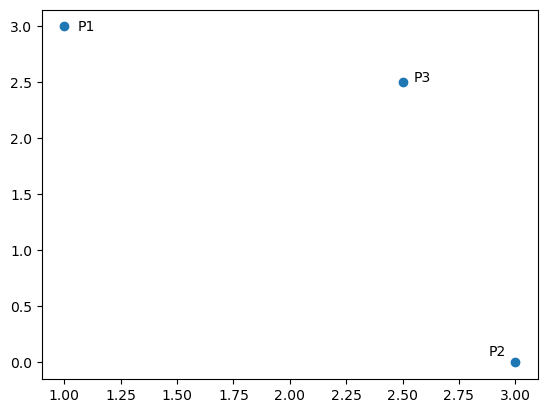

In [16]:
from matplotlib import pyplot as plt
import numpy as np

fig,ax = plt.subplots(1)
xs = np.array([1,2.5,3])
ys = np.array([3,2.5,0])
plt.scatter(xs,ys)
plt.text(1.06, 3.0, 'P1', horizontalalignment='left', 
     verticalalignment='center')
plt.text(2.88, 0.1, 'P2', horizontalalignment='left', 
     verticalalignment='center')
plt.text(2.55, 2.54, 'P3', horizontalalignment='left', 
     verticalalignment='center')
plt.show()

Now suppose further that 
we want to be able compute the distance of any point like P1 
from the origin, or we want to 
be able to compute the distance between P2 and P3. 

We can represent the points as objects that have x and y attributes.  We
can then compute the distance from the origin and the distance between points
using these attributes.

### The Point example

We can implement these ideas with a `Point` class:

In [28]:
Point()

TypeError: Point.__init__() missing 2 required positional arguments: 'x' and 'y'

In [41]:
import math

class Point(object):

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
       return f"Point({self.x}, {self.y})"

    def __eq__ (self, other):
        if self.x == other.x and self.y == other.y:
            return True
        else:
            return False

    def distance_from_origin (self):
        return math.sqrt(self.x**2 + self.y**2)

    def distance(self, p2=None):
        if p2 is None:
            p2 = Point(0,0)
        return math.sqrt((p2.x - self.x)**2 + (p2.y - self.y)**2)
    
    def __mul__(self, other):
        return Point(x=(self.x*other.x)-(self.y*other.y),
                     y=(self.y*other.x)+(self.x*other.y))

In [42]:
P19 = Point(3,4)

In [19]:
P1 = Point(3,4)
P2 = Point(2,3)
print(P1 * P2)

Point(-6, 17)


In [24]:
P1 == P19

True

In [23]:
6 + 8j + 9j -12

(-6+17j)

In [24]:
(3+4j) * (2+3j)

(-6+17j)

In [7]:
x=4
x*1j

4j

There are four function definitions in the code
block that defines the class.

Each of these class-specific functions has a special status, so they are called
**methods**.  Each of them is intended be called by instances of the class, typically
to perform operations involving themselves;  thus, the first parameter of a method 
will be bound to the class instance.  It is a code-writing convention to
use the name `self` for that parameter.

The block of code in the class definition defines the methods a class instance
can use; and although it's not immediately obvious in the code above, it also 
provides a specification for how instances of the class are to be created.

We illustrate with the 3 points drawn above.

In [20]:
p1 = Point(1,3)
p2 = Point(2.5,2.5)
p3 = Point(3,0)

In [38]:
print(p1)
print(p2)
print(p3)

Point(1, 3)
Point(2.5, 2.5)
Point(3, 0)


The Python convention is that the class is callable and that it is called to create
instances of the class.  The fact that the x and y coordinates must be supplied
when creating a `Point` instance is determined by making x and y parameters
of the `__init__` method, which, if supplied, is always executed when 
an instance is created.  This means every point will have an x and y attribute.

In [21]:
print(p2.x)
print(p2.y)

2.5
2.5


and that means methods like `distance_from_origin` and `distance` which
make reference to those attributes, will work on any point.

In [22]:
p2.distance_from_origin()

3.5355339059327378

In [43]:
distance_from_origin(P1)

NameError: name 'distance_from_origin' is not defined

In [132]:
p1.distance_from_origin()

3.1622776601683795

In [118]:
p1.distance(p2)

1.5811388300841898

In [119]:
p2.distance(p1)

1.5811388300841898

The class methods are not called the way normal functions are.  The `self` argument
comes first, followed by a period (`.`) followed by the other arguments.  We have
seen this syntax befiore in some of the methods called on Python's builtin types. More
on this syntax below.

Note that `distance` is a method involving two points. One of these points 
must be be chosen as the `self` point (the "point" of view, as it were), but
the definition of `distance` guarantees that  whichever of the two points calls the
method, the result is the same.

The `__eq__` method is called whenever we are testing whether two points
are equivalent; like the `distance` method it can be called by any
point to compare itself to another, but it also has a special status.
The Python interpreter knows to use it whenever the equivalence of two point
instances is in question, for instance, when using `==`:

In [120]:
print(p1.__eq__(p2))
print(p1 == p2)

False
False


In [41]:
# Let's put another point instance in the same place as p2
p2a = Point(2.5,2.5)
p2 == p2a

True

Since `in` calls `==` under the hood, the `__eq__` method will also be used with `in`
tests:

In [122]:
p2 in [p1,p3,p2a]

True

The unwritten Python convention is that all methods that have a name
that begins and ends with double_underscore (so-called **dunder** methods, also called **magic** methods) have a special status, often
one honored by Python's builtin operators. For example, whenever
`==` is applied to two class instances, Python will check for an  `__eq__` method
and, if it is available will use it to determine equality.
Similarly, `__add__` can be used to implement a semantics for `+`
with a custom class and `__mul__` to implement a semantics for `*`.

A somewhat different example is `__str__`, which returns a string; Python
will use call this method to define the string used
when printing instances of the `Point` class:

In [42]:
print(p1)

Point(1, 3)


Note that this is different from what the Python interpreter prints when evaluating an instance.

In [43]:
p1

There's a lot more to be said about dunder methods and about classes
in general, especially if one
wants to begin programming with them, but the key ideas we
need to establish for our purposes are:

1.  Classes can be defined in any body of code.  When you import a module,
you will often be importing class definitions as well as function and variable
definitions.
2.  Once a class is defined, Python has conventions for creating new instances
and for calling methods.

    a.  A class instance is created by calling the name of the class together with the non-`self` arguments of the `__init__` method. Internally, the method `__new__` creates the instance; and the method `__init__` is called on that.
    
    b.  Methods are generally called by an instance of the class using the special method syntax.  

Note that methods are functions in the class namespace; and can even be called that way.

In [76]:
Point.distance(p1,p2)

1.5811388300841898

A corollary is that the name `distance` does not belong to the `__main__` (top-level)
namespace, and the `distance` method cannot be called this way:

In [135]:
distance(p1,p2)

NameError: name 'distance' is not defined

There are two features that make methods special:

1.  Class instances like `p1` and `p2` can call the methods, as shown above; in effect the instances inherit the namespace of the class.
2.  The instance (`self`) argument is given special treatment when an instance calls the method.

To verify that the instance inherits its classes attributes we can inspect the namespaces of the instance and the class using `dir`. 

In [44]:
set(dir(p1)) - set(dir(Point))

{'x', 'y'}

The sole attributes unique to the instance are the two attributes it was given
when it was created.

Summary of the main points in this section.

1.  Classes fulfilling specific computational needs can be defined
in any body of code using a `class` definition.
2.  Class instances inherit the attributes of their class but can also
have their own individualizing attributes.
3.  Many Dunder (double  underscore) methods have special interpretations
supported by Python, and these can be leveraged to make customized class
instances behave more like builtin Python types.  For more examples
of this working see the `FrenchDeck` class in the optional appendix to this
notebook.

**Optional exercise A**:  Think about a sensible interpretation of adding points
and implement it so that the following works:

```
p3 = p1 + p2
```
**Optional exercise B** (for the mathematically inclined):  Creat a new class `IPoint`
that represents points on the Complex plane.  In place of the `x` and `y` coordinates
we will have the `real` and `imag` component. 
Modify the definition of __str__ to suggest this interpretation. 

Also `p1.imag` should return
the imaginary component and `p1.real` the real component,  For example

```python
>>> p1 = IPoint(3,-4)
>>> p1.imag
-4
```

Implement multiplication between points.

```python
>>> p2 = IPoint(2,3)
>>> p3 = p1 * p2
>>>p3.real
18
>>>p3.imag
1
```
Note this should behave, quantitatively, like multiplication between complex numbers,
but it should return another insytance of `IPoint`, not a complex number.  Be sure
to correctly implement the 

In [83]:
## A


class Point(object):

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
       return f"Point({self.x}, {self.y})"

    def __eq__ (self, other):
        if self.x == other.x and self.y == other.y:
            return True
        else:
            return False
        
    def __add__ (self, other):
        return Point(self.x + other.x, self.y + other.y)
    

In [84]:
## B


class IPoint(object):

    def __init__(self, x, y):
        self.real = x
        self.imag = y
        self.val = x + 1j*y

    def __str__(self):
        return f"{self.real} + {self.imag}j"

    def __eq__ (self, other):
        #if self.real == other.real and self.imag == other.imag:
        #    return True
        #else:
        #    return False
        return (self.real == other.real) and (self.imag == other.imag)
        
    def __add__ (self, other):
        return IPoint(self.real + other.real, self.imag + other.imag)
 
    def __mul__(self, other):
        newval = self.val * other.val
        return IPoint(newval.real,newval.imag)
        #return IPoint(x=(self.real*other.real)-(self.imag*other.imag),
        #            y=(self.imag*other.real)+(self.real*other.imag))
        
    def distance_from_origin (self):
        return math.sqrt(self.real**2 + self.imag**2)

    def distance(self, p2=None):
        if p2 is None:
            p2 = Point(0,0)
        return math.sqrt((p2.real - self.real)**2 + (p2.imag - self.imag)**2)
     

# Another perfectly valid solution
# that shows why you wouldnt really want to
# implement this class
class IPoint2(complex):

     pass

In [61]:
p23 == p23

True

In [91]:
print(6+9j-8j+12)
p23,p17 = IPoint(2,3), IPoint(3,-4)
p12 = p23 + p17
print(p12)
p13 = p23 * p17
print(p13)
print(p23.distance_from_origin())

(18+1j)
5 + -1j
18.0 + 1.0j
3.605551275463989


In [92]:
print(p23.distance(p17))

7.0710678118654755


In [68]:
IPoint2(2,3)

(2+3j)

In [93]:
q23,q17 = IPoint2(2,3), IPoint2(3,-4)
q12 = q23 + q17
print(q12)
q13 = q23 * q17
print(q13)

(5-1j)
(18+1j)


The distance from origin functionality

In [94]:
numpy.abs(q23)

3.6055512754639896

In [ ]:
Distance between points.

In [95]:
numpy.abs(q23-q17)

7.0710678118654755

### Analogy between Classes and Python builtin types

Note that much of what we have said about classes applies to builtin Python types.

Types like `str` (string) have instances and those instances can call methods
specific to the type.

In [45]:
'Cat'.lower()

'cat'

The type name can be called to create instances of the type:

In [46]:
tuple('cat')

('c', 'a', 't')

In [47]:
str(123)

'123'


Type methods are functions in the type namespace and can be called that way:

In [48]:
str.lower('Cat')

'cat'

## Classes in imported modules

Many modules define classes; in many cases there is a distinguished class implementing the core features of the module's functionality.  For `numpy`, a good candidate would
be th n-dimensional array class

In [8]:
import numpy as np
a = np.array([1,2,3])
print(type(a))
a

<class 'numpy.ndarray'>


array([1, 2, 3])

The object `a` is a `numpy` `array`.  This is
a class defined in the `numpy` module for
primarily for storing numerical data
in sequential and table form. In
this case we've constructed a 1D array that looks
a lot like like a list and shares many logical
properties with lists, including
being sequential, and being modifiable.

But there are also many attributes and methods that
`numpy` ndarrays have that lists don't.

In [30]:
a = np.array([1,6,3,2])
print(f'{a=} {a.shape=}',end="\n\n")

print(f"a.reshape((2,2)) Size in 2 Dimensions\n\n{a.reshape((2,2))}",end="\n\n")
print(f"{a.reshape((2,2)).shape=}",end="\n\n")
print("a.min()", a.min(),"a.max()", a.max())
print()
a.sort()
print('a after a.sort()', a)
print()
print(f'a.reshape((2,2))\n\n {a.reshape((2,2))}',end="\n\n")
print(f'{a=}')# again (order of elements changed but shape unchanged)', a)

a=array([1, 6, 3, 2]) a.shape=(4,)

a.reshape((2,2)) Size in 2 Dimensions

[[1 6]
 [3 2]]

a.reshape((2,2)).shape=(2, 2)

a.min() 1 a.max() 6

a after a.sort() [1 2 3 6]

a.reshape((2,2))

 [[1 2]
 [3 6]]

a=array([1, 2, 3, 6])


We show the **shape** of the ndimensional array (this is a 1D array so its shape is
the same as its length); then we **reshape** it into a 2 x 2 table, making a 2 D
array.  Then we found its min and max and sorted it and reshaped it again
to get a different 2D table.

It turns out that `.sort()` is the only one
of these operations that will also work on lists.

In [10]:
L = [1,6,3,2]
print(L.min())

AttributeError: 'list' object has no attribute 'min'

Similarly, a list doesn't have a shape.  It's intrinsically 1 D.

In [11]:
print(L.shape)

AttributeError: 'list' object has no attribute 'shape'

Hence you can't reshape lists:

In [12]:
L.reshape((2,2))

AttributeError: 'list' object has no attribute 'reshape'

The takeaway is this:  Ndimensional arrays are quite different than lists
and certainly merit being a different class/type.  We'll  learn more about
them in the next module.

Turning from `numpy` to `pandas`: in `pandas` the key class is the `DataFrame`:

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'name': (None,'Barney','Wilma','Betty'),
                   'gender': ('M','M','F','F'),
                   'family name': ('Flintstone','Rubble','Flintstone','Rubble'),
                    'hobby': ('bowling','bowling','gardening','dance'),
                    'pet': ('Dino','Hoppy','Dino','Hoppy'),
                    'spouse': ('Wilma','Betty','Fred','Barney')})
#df['name'][0] = np.nan
df

,name,gender,family name,hobby,pet,spouse
0,None,M,Flintstone,bowling,Dino,Wilma
1,Barney,M,Rubble,bowling,Hoppy,Betty
2,Wilma,F,Flintstone,gardening,Dino,Fred
3,Betty,F,Rubble,dance,Hoppy,Barney


A `DataFrame` is a generic container for data in tabular form.
The `pandas` module provides many functions for creating,
comb`ining, and manipulating `DataFrame` instances. 
And DataFrame`s have many attributes and methods
specific to `DataFrame`s.

We'll look at just two to illustrate the relationship
to the way other class attributes and methods work.
First every `DataFrame` has an attribute `columns`
containing all its columns,
and almost every column printed out in the `DataFrame` above is an attribute.

In [2]:
print(df.columns)
print()
print(f"{df.name=}\n\n{df.gender=}\n\n{df.hobby=}\n\n{df.pet=}\n\n{df.spouse=}")

Index(['name', 'gender', 'family name', 'hobby', 'pet', 'spouse'], dtype='object')

df.name=0      None
1    Barney
2     Wilma
3     Betty
Name: name, dtype: object

df.gender=0    M
1    M
2    F
3    F
Name: gender, dtype: object

df.hobby=0      bowling
1      bowling
2    gardening
3        dance
Name: hobby, dtype: object

df.pet=0     Dino
1    Hoppy
2     Dino
3    Hoppy
Name: pet, dtype: object

df.spouse=0     Wilma
1     Betty
2      Fred
3    Barney
Name: spouse, dtype: object


Can you guess why the column  `family name` is not an attribute?

In [4]:
df.family name

SyntaxError: invalid syntax (3923766202.py, line 1)

But isn't quite right to conclude that `family name` isn't an attribute.  It is, it just can't be accessed the usual way.

How to solve that problem:

In [3]:
getattr(df,"family name")

0    Flintstone
1        Rubble
2    Flintstone
3        Rubble
Name: family name, dtype: object

The correct description of the situation is that `family name` is not an attribute **name** because
it doesn't satisfy Python's syntactic requirements for a name.  Among other things it doesn't show
up when we do `dir(df)` which returns a complete listing of `df`'s namespace (see also `var`).


In [11]:
# For a ciomplete listong of the namespace
#dir(df)
print("family name"  in dir(df))
print("pet"  in dir(df))

False
True


So `family name` is an attribut but not an attribute name.

Also `pandas` has its own syntax for accessing the content of a column, which is robust for
all forms of column attributes:

In [9]:
df["family name"]

0    Flintstone
1        Rubble
2    Flintstone
3        Rubble
Name: family name, dtype: object

Second, among its many methods a `DataFrame` has  is a `.count()` method which by
default counts the number of values in each column (the `None` in the `gender` column
is understood a non-value so the `gender` column has 1 fewer value than the others).

In [34]:
df.count()

name           3
gender         4
family name    4
hobby          4
pet            4
spouse         4
dtype: int64

Since we're going to spend the next three modules working with `numpy` arrays
and `pandas` Dataframes, let's zoom on in on another example; the `networkx`
module is a large complicated module 
defining a number of operations and 
algorithms connected with networks, which
are called graphs by mathematicians The
key class is the `Graph` class.

In [13]:
import networkx as nx

`networkx` has a vast namespace containing many functions and classes, one of which is
`Graph`.

In [14]:
print(len(dir(nx)))
print('Graph', "Graph" in dir(nx))

906
Graph True


We illustrate `Graph` by working a toy example.

In [15]:
G = nx.Graph()

In [16]:
G

`G` is a `Graph` instance with its own set of methods, for instance:

In [17]:
G.neighbors

<bound method Graph.neighbors of <networkx.classes.graph.Graph object at 0x7fe15e2c82e8>>

Now let's add an edge.

In [18]:
G.add_edge(2,3)

And now a second and then some:

In [19]:
G.add_edge(3,1)
G.add_edge(1,2)
G.add_edge(2,4)
G.add_edge(1,5)
G.add_edge(2,5)
G.add_edge(3,5)
G.add_edge(4,5)
G.add_edge(4,1)
G.add_edge(4,3)

Now let's look at the nodes and edges.

In [20]:
G.nodes()

NodeView((2, 3, 1, 4, 5))

In [21]:
G.edges()

EdgeView([(2, 3), (2, 1), (2, 4), (2, 5), (3, 1), (3, 5), (3, 4), (1, 5), (1, 4), (4, 5)])

Returning to the `neighbors` method: the `neighbors` method takes
a node as an argument and returns the nodes that node is connected
to in the form of something called an iterator (something we can
loop through to actually find the neighbors).  Let's turn the
iterator into a list to spell out the neighbors.

In [22]:
list(G.neighbors(2))

[3, 1, 4, 5]

And this is in fact the list of nodes node 2 is connected to.

What else can you do with a Graph?

Well, independent of the vast namespace of `networkx`, `Graph` has its own 
internal namespace.  For instance:

In [23]:
dir(G)[50:60]

['graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory']

One thing you won't find is a draw method.  For that we need to call a function.

Here's drawing illustrated.

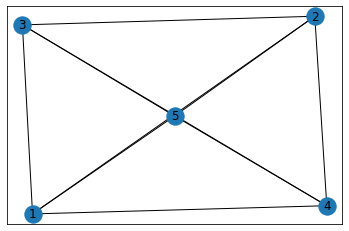

In [156]:
nx.draw_networkx(G)

Why is drawing
a function and not a method?  This has to do with the `networkx` designers' model of how Graphs will
be used and it is, frankly,
sometimes a matter of designer taste.  Does the term "drawing"
describe a class
of algorithms of various kinds that can be applied to Graphs, or is it an
operation structurally intrinsic to Graphs? Arguably it is the former,
perhaps even a class of algorithms applicable to a more general class
of things than graphs,
so it is perhaps viewed as a family of functions, with the one enjoying the status
of default drawing algorithm used above.

## Another custom class example (optional)

### The FrenchDeck: A Customized Sequence
#### More about dunder methods

The following example is from *Fluent Python* by Luciano Ramalho illustrates how you can customize a class to be  a **sequence**.


As noted in the `Point` class discussion, 
Python methods with double underscore (`__`) in their names and special
interpretations are called dunder methods.
The key to creating a custom sequence type is
to  define the dunder methods `__len__` and `__get_item__`.



In [168]:
import collections

Card = collections.namedtuple('Card', ['rank', 'suit'])

class FrenchDeck:
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()

    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits
                                        for rank in self.ranks]

    def __len__(self):
        return len(self._cards)

    def __getitem__(self, position):
        return self._cards[position]

In [163]:
deck = FrenchDeck()

In [164]:
deck

The following works because the `__len__` method is defined for the class `FrenchDeck`.

In [165]:
len(deck)

52

Note, for example, that `len` is undefined for points.

In [166]:
len(p2)

TypeError: object of type 'Point' has no len()

Similarly, because the `__get_item__` is defined for `FrenchDeck` instances,
we can access their elements with positional indexing:

In [167]:
deck[12]

Card(rank='A', suit='spades')

To probe this
a little further, let's first look at the class found within the FrenchDeck class,
cards.

In [65]:
card1 = Card('J','diamonds')

In [66]:
isinstance(card1, tuple)

True

A card is just a named tuple, a specialization of the builtin type `tuple` provided
by the Python collections module.

What's special is that the first and second positions in the 2-tuple have names.

In [61]:
card1 

Card(rank='J', suit='diamonds')

So the tuple can be accessed like this;

In [54]:
card1[0],card1[1]

('J', 'diamonds')

or like this:

In [71]:
card1.rank,card1.suit

('J', 'diamonds')

As a consequence our `FrenchDeck` class has many of the properties of
a list of tuples, because it is defined for `__getitem__` and
implements item-getting via the list (`self._cards`).

For example, the `FrenchDeck` class works with `in`:

In [39]:
card1 in deck

True

It can also be sliced and looped through like a list.

In [59]:
for cd in deck[15:20]:
    print(cd)

Card(rank='4', suit='diamonds')
Card(rank='5', suit='diamonds')
Card(rank='6', suit='diamonds')
Card(rank='7', suit='diamonds')
Card(rank='8', suit='diamonds')


The for-loop works because for any class defined for `__getitem__` but not
`__iter__`, Python tries to loop by using successively higher numerical
indices, and we have set things up in `__getitem__` so that that works.

Warning: This feature can bite you, especially if you're not thinking about
it.   Consider the following silly but seemingly harmless class definition.

```
class Foo:

   def __init__ (self, a):
       self.a = a
       
   def __getitem__(self, b):
       return self.a
 

>>> f = Foo(1)
>>> f[0], f[1]
(1,1)
>>> 1 in f
True
```

So we seem to have defined a container that
contains 1 in every position. Odd, but surely coherent.


But now we try:

```
>>> 2 in f
...
```

This seemingless harmless `in` request does not return `False`
or raise an error; it sends you into
an infinite loop.  This is because this call to `in` is a request 
to iterate through `f` seeking something equal to `2`.  So Python
tries the indices 0,1,2,3,... always returning 1 and having
no way to stop iterating.

So when implementing `__getitem__` either define an `__iter__` method
explicitly with some way to stop built in or delegate to something
that has criteria for stopping the iteration, as in the definition
of `FrenchDeck`, where `__getitem__` delegates the work to a list.

Optional exercise.  Implement a random shuffle method for `FrenchDeck`,  Use
`shuffle` from the `random` module.  Make sure that everything that worked before 
still works.